# Análise dados de jogadores de futebol.
# Dataset: fifa19

# 1. Importando alguns pacotes que serão utilizados

In [4]:
# Importando as bibliotecas que serão usados para análise
# Importei também o ggplot para o design dos futuros viz

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')

In [5]:
# Identificando o arquivo como um objeto para visualização posteriormente 

df = pd.read_csv("C:/Users/lucas/OneDrive/PROGRAMAÇÃO/FIFA19.csv")

In [6]:
# Você pode visualizar o dataframe tanto digitando o nome da variável ou colocando head para específica a quantidade de linhas
# df.head(nlinhas) ou df
df.head(5)

,NAME,CLUB,LEAGUE,POSITION,TIER,RATING,PACE,SHOOTING,PASSING,DRIBBLING,DEFENDING,PHYSICAL,LOADDATE
0,Pelé,Icons,Icons,CAM,Gold,98,95,96,93,96,60,76,2018-09-19 12:10:05
1,Diego Maradona,Icons,Icons,CAM,Gold,97,92,93,92,97,40,76,2018-09-19 12:10:05
2,Ronaldo,Icons,Icons,ST,Gold,96,97,95,81,95,45,76,2018-09-19 12:10:05
3,Pelé,Icons,Icons,CF,Gold,95,96,93,90,95,56,75,2018-09-19 12:10:05
4,Diego Maradona,Icons,Icons,CAM,Gold,95,88,91,90,95,42,75,2018-09-19 12:10:05


In [185]:
# Obs: Também podemos utilizar os comandos do SQL, que fica ainda mais fácil, segue abaixo:

# 2. Utilizando SQL dentro do Pandas

In [7]:
# Instalando o pacote para usar o sql dentro do pandas

!pip install -U pandasql

In [8]:
# Assim, obteremos:

import pandasql as ps

# Basta você aplicar os conceitos de query dentro do pandas, é muito fácil para consultar rápidas, vejamos alguns exemplos:

query = """select * from df"""
ps.sqldf(query, locals())

,NAME,CLUB,LEAGUE,POSITION,TIER,RATING,PACE,SHOOTING,PASSING,DRIBBLING,DEFENDING,PHYSICAL,LOADDATE
0,Pelé,Icons,Icons,CAM,Gold,98,95,96,93,96,60,76,2018-09-19 12:10:05
1,Diego Maradona,Icons,Icons,CAM,Gold,97,92,93,92,97,40,76,2018-09-19 12:10:05
2,Ronaldo,Icons,Icons,ST,Gold,96,97,95,81,95,45,76,2018-09-19 12:10:05
3,Pelé,Icons,Icons,CF,Gold,95,96,93,90,95,56,75,2018-09-19 12:10:05
4,Diego Maradona,Icons,Icons,CAM,Gold,95,88,91,90,95,42,75,2018-09-19 12:10:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13628,Halldor Stenevik,SK Brann,Norway Eliteserien,LW,Bronze,53,63,42,38,50,41,56,2018-09-19 12:10:08
13629,Giles Phillips,Queens Park Rangers,England EFL Championship,CB,Bronze,53,56,39,44,46,44,45,2018-09-19 12:10:08
13630,Adam Crookes,Lincoln City,England EFL League Two,CDM,Bronze,53,58,32,46,49,44,48,2018-09-19 12:10:08
13631,Lucas Hedlund,BK Häcken,Sweden Allsvenskan,LW,Bronze,53,59,32,46,47,45,47,2018-09-19 12:10:08


In [9]:
# Podemos utilizar where, like, or, group by, order by, top, limit e dentre vários outros operadores 
query = """select *
from df
where RATING > 90  """

ps.sqldf(query, locals())

,NAME,CLUB,LEAGUE,POSITION,TIER,RATING,PACE,SHOOTING,PASSING,DRIBBLING,DEFENDING,PHYSICAL,LOADDATE
0,Pelé,Icons,Icons,CAM,Gold,98,95,96,93,96,60,76,2018-09-19 12:10:05
1,Diego Maradona,Icons,Icons,CAM,Gold,97,92,93,92,97,40,76,2018-09-19 12:10:05
2,Ronaldo,Icons,Icons,ST,Gold,96,97,95,81,95,45,76,2018-09-19 12:10:05
3,Pelé,Icons,Icons,CF,Gold,95,96,93,90,95,56,75,2018-09-19 12:10:05
4,Diego Maradona,Icons,Icons,CAM,Gold,95,88,91,90,95,42,75,2018-09-19 12:10:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Kevin De Bruyne,Manchester City,England Premier League,CAM,Gold,91,80,90,79,87,52,85,2018-09-19 12:10:05
68,Luis Suárez,FC Barcelona,Spain Primera Division,ST,Gold,91,76,76,90,91,70,67,2018-09-19 12:10:05
69,Luka Modrić,Real Madrid,Spain Primera Division,CM,Gold,91,75,63,71,72,91,84,2018-09-19 12:10:05
70,Sergio Ramos,Real Madrid,Spain Primera Division,CB,Gold,91,91,82,86,94,35,67,2018-09-19 12:10:05


In [11]:
# Nesse caso, ordernando por nome em ordem crescente (asc)

query = """select *
from df
where RATING > 90
order by NAME asc"""

ps.sqldf(query, locals())

,NAME,CLUB,LEAGUE,POSITION,TIER,RATING,PACE,SHOOTING,PASSING,DRIBBLING,DEFENDING,PHYSICAL,LOADDATE
0,Alan Shearer,Icons,Icons,ST,Gold,91,81,93,77,78,52,85,2018-09-19 12:10:05
1,Alessandro Del Piero,Icons,Icons,CF,Gold,92,83,92,89,92,43,67,2018-09-19 12:10:05
2,Alessandro Nesta,Icons,Icons,CB,Gold,92,72,42,65,67,94,86,2018-09-19 12:10:05
3,Andriy Shevchenko,Icons,Icons,ST,Gold,91,88,92,72,87,34,75,2018-09-19 12:10:05
4,Bobby Moore,Icons,Icons,CB,Gold,92,68,64,83,78,93,85,2018-09-19 12:10:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Ryan Giggs,Icons,Icons,LM,Gold,92,90,80,90,91,44,67,2018-09-19 12:10:05
68,Sergio Ramos,Real Madrid,Spain Primera Division,CB,Gold,91,91,82,86,94,35,67,2018-09-19 12:10:05
69,Steven Gerrard,Icons,Icons,CM,Gold,91,80,87,90,88,68,82,2018-09-19 12:10:05
70,Sócrates,Icons,Icons,CAM,Gold,91,77,90,90,85,77,84,2018-09-19 12:10:05


# 2. Pacotes Pandas

In [12]:
# Utilizando o pacote describe é possível visualizar algumas informações como a quantidade de linhas não nulas, a média, mínimo 
# máximo etc.

df.describe()

,RATING,PACE,SHOOTING,PASSING,DRIBBLING,DEFENDING,PHYSICAL
count,13633.000000,13633.000000,13633.000000,13633.000000,13633.000000,13633.000000,13633.000000
mean,67.691631,68.265165,53.143329,58.076432,63.132693,52.437321,66.049586
std,6.923011,11.716115,14.478422,10.781053,10.297607,16.294289,9.505151
min,53.000000,24.000000,15.000000,24.000000,24.000000,15.000000,30.000000
25%,63.000000,62.000000,42.000000,51.000000,57.000000,38.000000,60.000000
50%,67.000000,69.000000,55.000000,59.000000,64.000000,57.000000,67.000000
75%,72.000000,76.000000,64.000000,65.000000,70.000000,65.000000,73.000000
max,98.000000,97.000000,96.000000,93.000000,97.000000,96.000000,91.000000


In [13]:
# Voltando para os pacotes Pandas
# Com este pacote, é possível observar as informações sobre os dados, como seu tipo, i.e dtypes.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13633 entries, 0 to 13632
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NAME       13633 non-null  object
 1   CLUB       13633 non-null  object
 2   LEAGUE     13633 non-null  object
 3   POSITION   13633 non-null  object
 4   TIER       13633 non-null  object
 5   RATING     13633 non-null  int64 
 6   PACE       13633 non-null  int64 
 7   SHOOTING   13633 non-null  int64 
 8   PASSING    13633 non-null  int64 
 9   DRIBBLING  13633 non-null  int64 
 10  DEFENDING  13633 non-null  int64 
 11  PHYSICAL   13633 non-null  int64 
 12  LOADDATE   13633 non-null  object
dtypes: int64(7), object(6)
memory usage: 1.4+ MB


- Nosso dataframe possui 13633 linhas e 13 colunas

In [14]:
# Mas, também, podemos analisar as variáveis que mais possuem correlação uma com a outra. Antes, precisamos utilizar somente os dados númericos
# Para isso, utilizaremos a função select e exclude
df1 = df.select_dtypes(exclude = 'object')

In [15]:
# Para veirifcação da correlação, vamos utilizar o pacote corr

df1.corr()

,RATING,PACE,SHOOTING,PASSING,DRIBBLING,DEFENDING,PHYSICAL
RATING,1.000000,0.198632,0.517512,0.687645,0.636698,0.305925,0.477179
PACE,0.198632,1.000000,0.369532,0.298604,0.552082,-0.314576,-0.187162
SHOOTING,0.517512,0.369532,1.000000,0.668535,0.783276,-0.409148,-0.005085
PASSING,0.687645,0.298604,0.668535,1.000000,0.839878,0.134956,0.112317
DRIBBLING,0.636698,0.552082,0.783276,0.839878,1.000000,-0.171953,-0.040126
DEFENDING,0.305925,-0.314576,-0.409148,0.134956,-0.171953,1.000000,0.549485
PHYSICAL,0.477179,-0.187162,-0.005085,0.112317,-0.040126,0.549485,1.000000


In [16]:
# Para melhor visualização, o gradiente é uma boa opção...

df1.corr().style.background_gradient(cmap = 'Reds')

,RATING,PACE,SHOOTING,PASSING,DRIBBLING,DEFENDING,PHYSICAL
RATING,1.000000,0.198632,0.517512,0.687645,0.636698,0.305925,0.477179
PACE,0.198632,1.000000,0.369532,0.298604,0.552082,-0.314576,-0.187162
SHOOTING,0.517512,0.369532,1.000000,0.668535,0.783276,-0.409148,-0.005085
PASSING,0.687645,0.298604,0.668535,1.000000,0.839878,0.134956,0.112317
DRIBBLING,0.636698,0.552082,0.783276,0.839878,1.000000,-0.171953,-0.040126
DEFENDING,0.305925,-0.314576,-0.409148,0.134956,-0.171953,1.000000,0.549485
PHYSICAL,0.477179,-0.187162,-0.005085,0.112317,-0.040126,0.549485,1.000000


In [194]:
# De fato, é possível observar que os jogadores mais novos possuem um maior potencial, confirmando sua correlação.

In [17]:
# Agora, podemos fazer algumas análises na própria tabela, de modo a plotar...
# Definiremos uma função de modo que se o valor overall for menor ou igual que 91, será retornado vermelho, caso contrário, preto.
# Será utilizado o pacote head, de novo.
# Essa função é muito utilizada no excel, geralmente em uma tabela dinâmica...

def low_value_red(value):
    color = "red" if value <= 95 else "black"
    return 'color: %s' %color

df[['RATING']].head(8).style.applymap(low_value_red)

,RATING
0,98
1,97
2,96
3,95
4,95
5,94
6,94
7,94


In [196]:
# Podemos plotar no dataframe também, vejamos:

In [18]:
df.head(8).style.applymap(low_value_red, subset = ['RATING'])

,NAME,CLUB,LEAGUE,POSITION,TIER,RATING,PACE,SHOOTING,PASSING,DRIBBLING,DEFENDING,PHYSICAL,LOADDATE
0,Pelé,Icons,Icons,CAM,Gold,98,95,96,93,96,60,76,2018-09-19 12:10:05
1,Diego Maradona,Icons,Icons,CAM,Gold,97,92,93,92,97,40,76,2018-09-19 12:10:05
2,Ronaldo,Icons,Icons,ST,Gold,96,97,95,81,95,45,76,2018-09-19 12:10:05
3,Pelé,Icons,Icons,CF,Gold,95,96,93,90,95,56,75,2018-09-19 12:10:05
4,Diego Maradona,Icons,Icons,CAM,Gold,95,88,91,90,95,42,75,2018-09-19 12:10:05
5,Ronaldo,Icons,Icons,ST,Gold,94,93,93,80,93,46,80,2018-09-19 12:10:05
6,Ronaldinho,Icons,Icons,LW,Gold,94,92,90,91,95,37,81,2018-09-19 12:10:05
7,Paolo Maldini,Icons,Icons,CB,Gold,94,86,56,75,69,96,83,2018-09-19 12:10:05


# 3. Agora, analisaremos alguns possíveis casos, visualizando os dados:

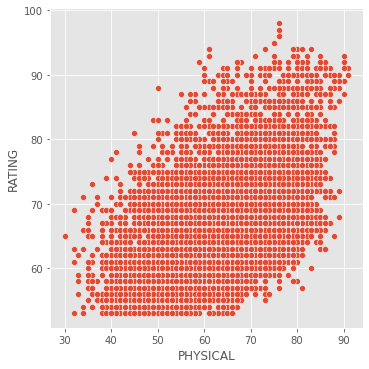

In [19]:
# Neste caso, como foi visto na tabela de correlação, o físico tem impacto de 47% com o geral, ou seja :
sns.relplot(x="PHYSICAL", y="RATING", data=df)

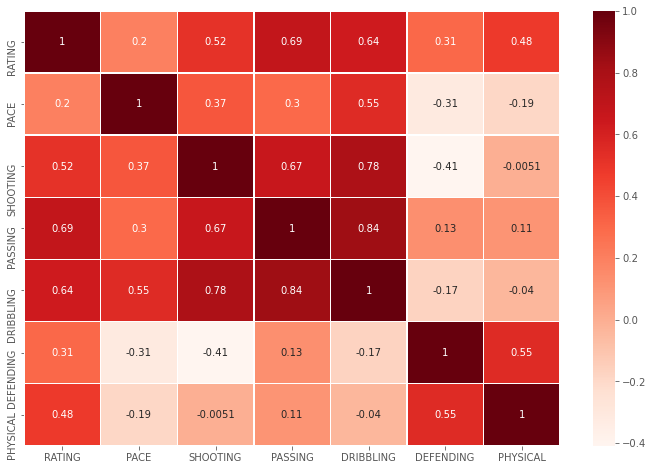

In [22]:
# Utilizando seaborn para plotar um gráifico de calor com base nas variáveis de correlação

fig, ax = plt.subplots(figsize = (12,8))

_ = sns.heatmap(df1.corr(), cmap = 'Reds', linewidth = 0.5, annot = True)

In [23]:
# Aqui utlizaremos o pacote do pandas para MOSTRAR os valores unicos da categoria TIER

df['TIER'].unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [24]:
# Aqui utlizaremos o pacote do pandas para CONTAR os valores unicos da categoria TIER

df.TIER.value_counts(0)

Silver    7033
Bronze    4519
Gold      2081
Name: TIER, dtype: int64

In [25]:
# Em porcentagem, basta colocar 1 dentro dos parênteses

df.TIER.value_counts(1)

Silver    0.515881
Bronze    0.331475
Gold      0.152644
Name: TIER, dtype: float64

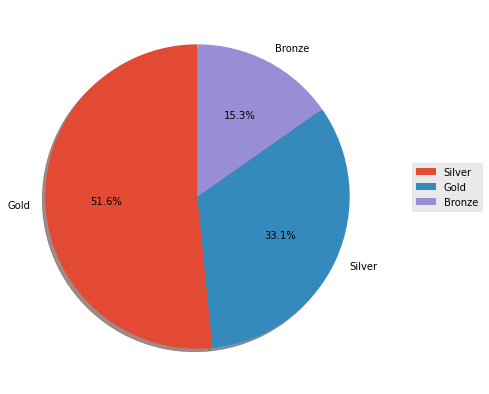

In [26]:
# Plotaremos um gráfico de pizza (pie) para melhor visualização:

fig = plt.figure(figsize =(10, 7)) 
plt.pie(df.TIER.value_counts(), labels = df['TIER'].unique(), autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.legend(["Silver","Gold","Bronze"], bbox_to_anchor = (1.05, 0.6))
plt.show()                                              
                                        

<AxesSubplot:>

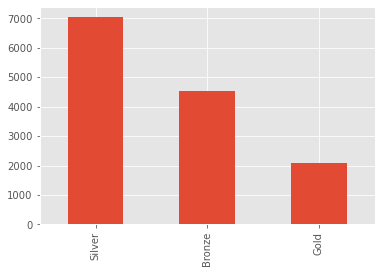

In [204]:
# Outra opção, é utilizar o gráfico de barras, utlizando o count e colocando apenas .plot.bar(), conforme abaixo:

df.TIER.value_counts().plot.bar()

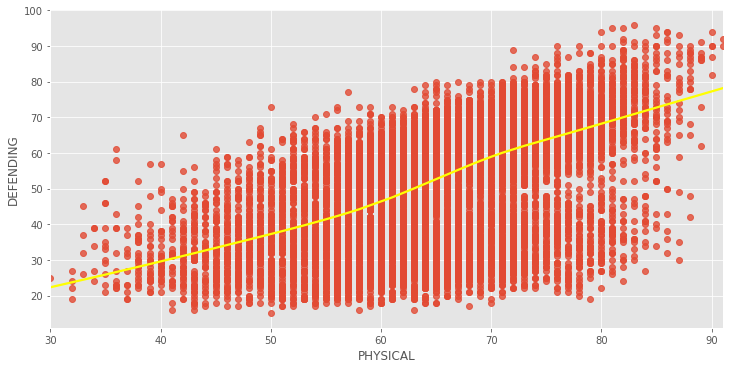

In [205]:
#Podemos analisar como o físico pode impactar na variável desefa. Para isso, utilizaremos uma regressão linear de modo a veirificar sua correlação.

sns.lmplot(x='PHYSICAL', y='DEFENDING', data=df, lowess=True, aspect=2, line_kws={'color' : 'yellow'})

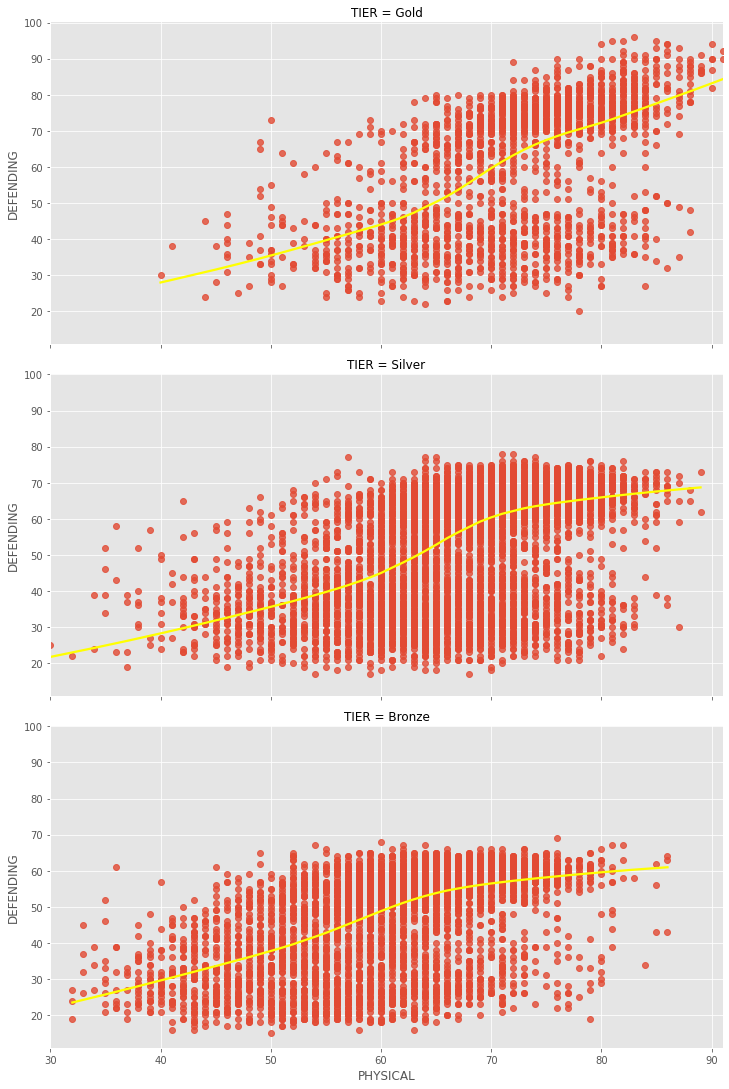

In [206]:
# Para ficar mais interessante, plotaremos para cada categoria de avaliação, i.e: gold, silver e bronze

sns.lmplot(x='PHYSICAL', y='DEFENDING', data=df, row='TIER' ,lowess=True, aspect=2, line_kws={'color' : 'yellow'})

# Conclusões

- 1. Na tabela de correlação fica mais claro a visualização sobre como uma variável pode mudar em relação a um parâmetro
- 2. Os "melhores" jogadores são de fato os que possuem Tier mais bem availiado, de modo que seu valor cresce linearmente com quase todas variáveis
- 3. As variáveis mais relevantes são, como base na tabela de correlação: RATING, PACE, SHOOTING, PASSING, DRIBBLING